K-means clustering from scratch

In [1]:
import pandas as pd 
import numpy as np
import cvxpy as cp 

In [30]:
# read in data from files

kmdata = pd.read_excel(r'drivers.xlsx')
kmdata = kmdata.iloc[:,1:].values
cluster = np.zeros([kmdata.shape[0],1])
kmdata = np.append(kmdata, cluster, 1)

In [31]:
# number of clusters
K = 2

In [32]:
# iterative refinement algorithm

# 1. randomly sample K centroids

# randomly initialize two equal size clusters

idx = np.random.randint(kmdata.shape[0], size=int(kmdata.shape[0]/2)) # random indexes 
for i in range(kmdata.shape[0]):
    if i in idx:
        kmdata[i,2] = 1
    else:
        kmdata[i,2] = 2

gamma1 = kmdata[idx,:2]
gamma2 = kmdata[-idx,:2]

# compute centroids

c1 = (1/gamma1.shape[0]) * np.sum(gamma1, axis = 0)
c2 = (1/gamma2.shape[0]) * np.sum(gamma2, axis = 0)

In [33]:
# iterations

while True:
    
    # 2. reassign vectors
    
    for i in range(kmdata.shape[0]):
        if np.linalg.norm(kmdata[i,:2] - c1) <= np.linalg.norm(kmdata[i,:2] - c2):
            kmdata[i,2] = 1
        else:
            kmdata[i,2] = 2
    
    new_idx = np.where(kmdata[:,2] == 1)[0]
    if np.array_equal(idx, new_idx):
        print("centroid 1", c1)
        print("centroid 2:", c2)
        break
    else:
        idx = new_idx
    
    gamma1 = kmdata[idx,:2]
    gamma2 = kmdata[-idx,:2]
    
    # 3. recompute centroids
    
    c1 = (1/gamma1.shape[0]) * np.sum(gamma1, axis = 0)
    c2 = (1/gamma2.shape[0]) * np.sum(gamma2, axis = 0)

centroid 1 [180.017075  18.29    ]
centroid 2: [49.8151625 20.08125  ]


<Figure size 432x360 with 0 Axes>

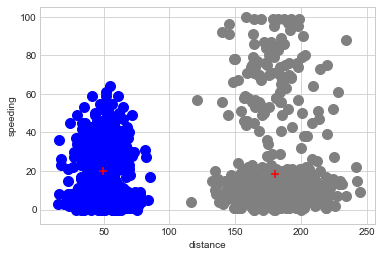

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=[6,5])
centers = np.concatenate(([c1], [c2]), axis=0)
x = kmdata[:,0]
y = kmdata[:,1]
cdict = {1: 'grey', 2: 'blue'}
cluster = np.unique(kmdata[:,2])

fig = plt.figure()
ax = fig.add_subplot(111)
#scatter = ax.scatter(x,y,c=kmdata[:,2],s=50)
for g in np.unique(cluster):
    ix = np.where(kmdata[:,2] == g)
    ax.scatter(x[ix], y[ix], c = cdict[g], label = g, s = 100)
for i,j in centers:
    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('distance')
ax.set_ylabel('speeding')
plt.scatter

plt.savefig('cluster.png')
#fig.show()